<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Linear Regression and KNN - Train/Test Split

---

# Introduction

To evaluate how our models would perform on new data, we split our data into a training set and a test set, train only on the training set, and evaluate on the test set. In $k$-fold cross validation we repeat this process $k$ times, using a different subset of our data as the test set each time.

We use this process to compare multiple models on the same data set. Those models could be variations on a single type (e.g. linear regression models with and without a particular feature), or they could be of completely different types.

Recall that k-fold cross-validation creates a hold portion of your data set for each iteration of training and validating:

![](http://i.imgur.com/0PFrPXJ.png)

## Linear Regression Practice

In this given task, you will be asked to model the median home price of various houses across U.S. Census tracts in the city of Boston.

In [308]:
import matplotlib.pyplot as plt

% matplotlib inline

In [309]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

boston1 = load_boston()

X = pd.DataFrame(boston1.data,
                 columns=boston1.feature_names)
y = pd.DataFrame(boston1.target,
                 columns=['MEDV'])

print(boston1['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

- Clean Up Data and Perform Exporatory Data Analysis

Boston data is from scikit-learn, so it ought to be pretty clean, but we should always perform exploratory data analysis.

**Items to include:**

- Data shape
- Data types
- Count of null values by column
- Basic summary statistics
- Number of unique values for each column
- Plot of the distribution of each column (e.g. histogram, bar plot, or box plot)
- Scatterplot of each column with median price

In [310]:
from pathlib import Path
path = Path('..','General Assembly','unit3_project-master','data','boston_data.csv')
boston = pd.read_csv(path)

In [311]:
boston.head()


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [312]:
boston.dtypes

Unnamed: 0      int64
CRIM          float64
ZN            float64
INDUS         float64
CHAS          float64
NOX           float64
RM            float64
AGE           float64
DIS           float64
RAD           float64
TAX           float64
PTRATIO       float64
B             float64
LSTAT         float64
MEDV          float64
dtype: object

In [313]:
boston.shape

(506, 15)

In [314]:
boston.isnull().sum()

Unnamed: 0    0
CRIM          0
ZN            0
INDUS         0
CHAS          0
NOX           0
RM            0
AGE           0
DIS           0
RAD           0
TAX           0
PTRATIO       0
B             0
LSTAT         0
MEDV          0
dtype: int64

In [315]:
#number unique values for each column
boston.nunique()

Unnamed: 0    506
CRIM          504
ZN             26
INDUS          76
CHAS            2
NOX            81
RM            446
AGE           356
DIS           412
RAD             9
TAX            66
PTRATIO        46
B             357
LSTAT         455
MEDV          229
dtype: int64

In [316]:
boston.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,378.750000,3.647422,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


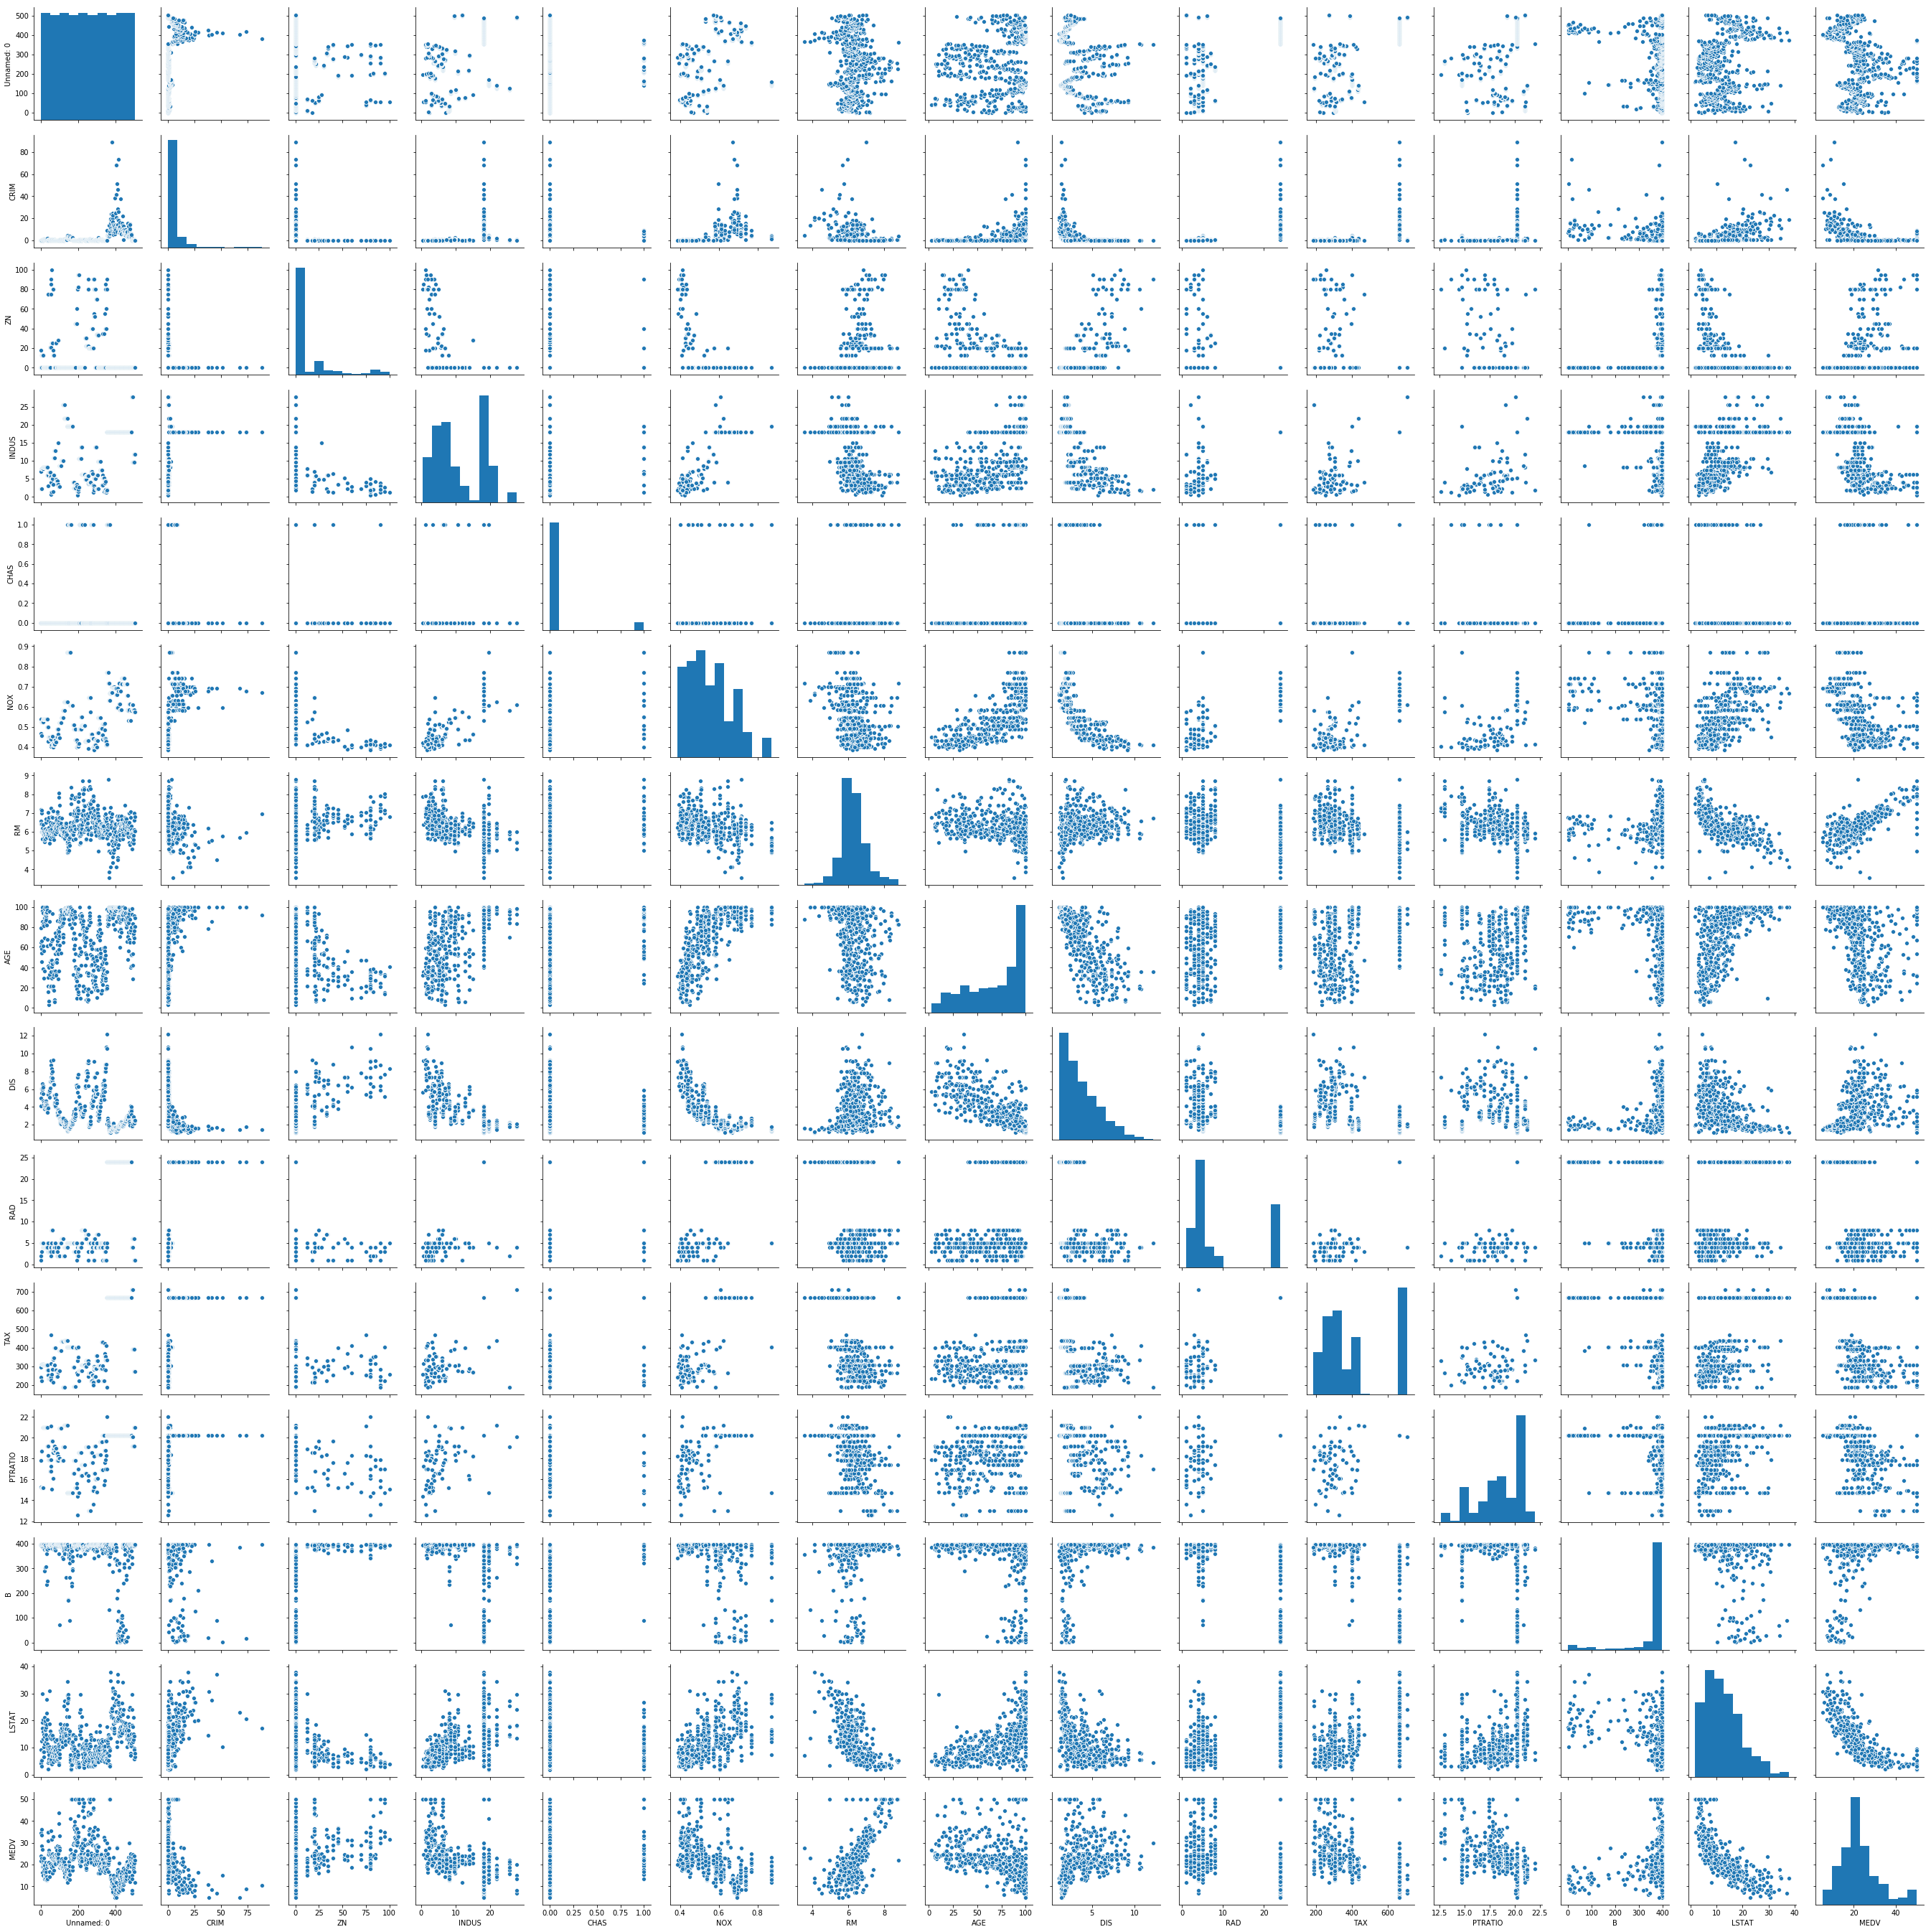

In [317]:
import seaborn as sn
pl = sn.pairplot(boston)

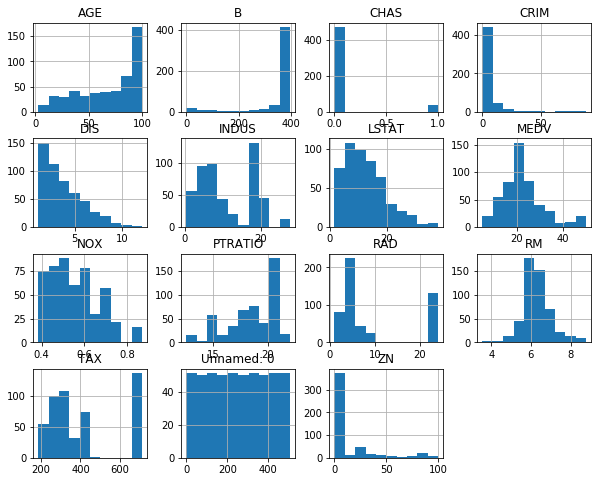

In [318]:
axes = boston.hist(figsize=(10, 8), bins=10)

In [319]:
boston.columns

Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

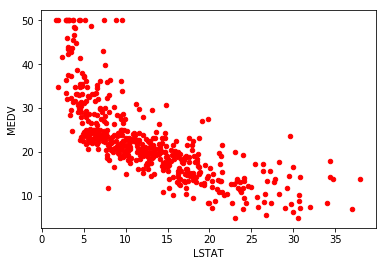

In [320]:
boston.plot.scatter(x= 'LSTAT',y = 'MEDV', c='red');

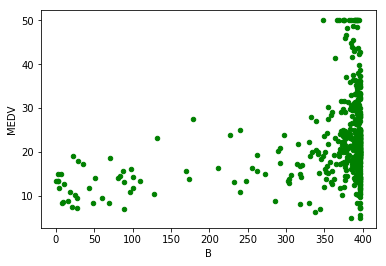

In [321]:
boston.plot.scatter(x= 'B',y = 'MEDV', c='green');

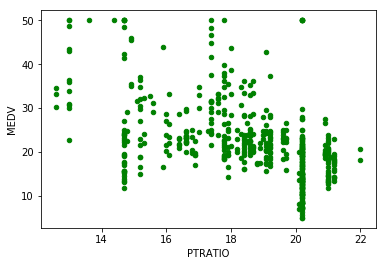

In [322]:
boston.plot.scatter(x= 'PTRATIO',y = 'MEDV', c='green');

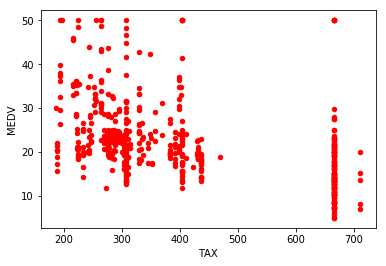

In [323]:
boston.plot.scatter(x= 'TAX',y = 'MEDV', c='red');

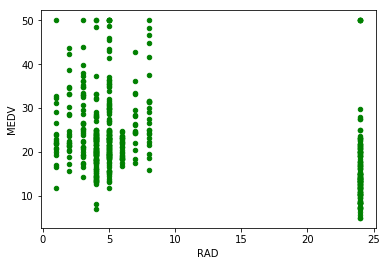

In [324]:
boston.plot.scatter(x= 'RAD',y = 'MEDV', c='green');

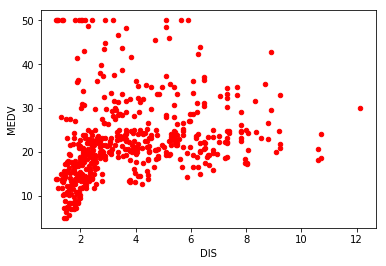

In [325]:
boston.plot.scatter(x= 'DIS',y = 'MEDV', c='red');

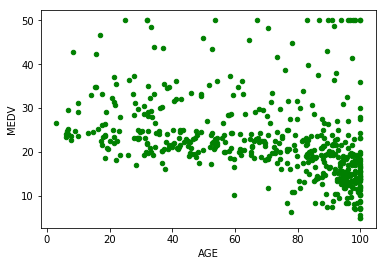

In [326]:
boston.plot.scatter(x= 'AGE',y = 'MEDV', c='green');

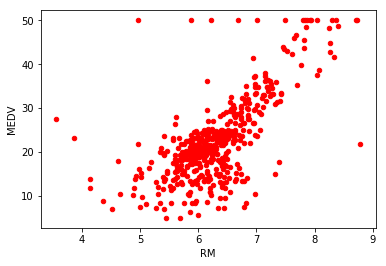

In [327]:
boston.plot.scatter(x= 'RM',y = 'MEDV', c='red');

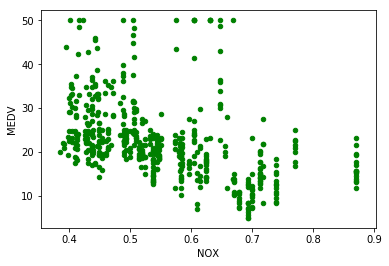

In [328]:
boston.plot.scatter(x= 'NOX',y = 'MEDV', c='green');

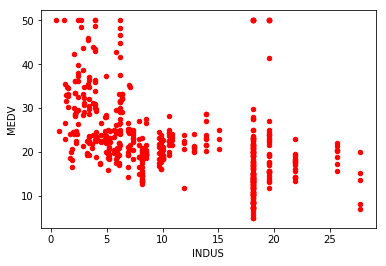

In [329]:
boston.plot.scatter(x= 'INDUS',y = 'MEDV', c='red');

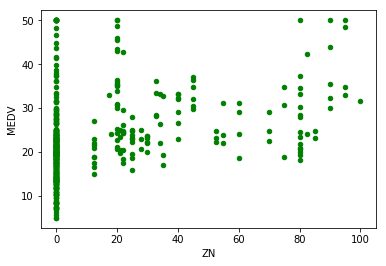

In [330]:
boston.plot.scatter(x= 'ZN',y = 'MEDV', c='green');

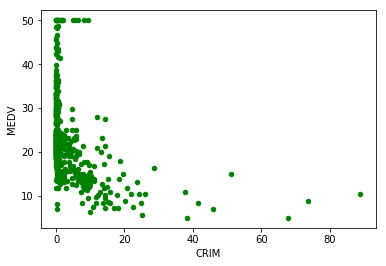

In [331]:
boston.plot.scatter(x= 'CRIM',y = 'MEDV', c='green');

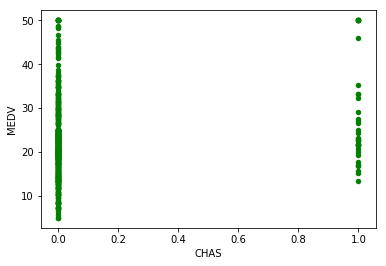

In [332]:
boston.plot.scatter(x= 'CHAS',y = 'MEDV', c='green');

- Get the MSE of a null model that simply predicts the mean value of MEDV. (You could do a train/test split here, but it won't make much difference for such a simple model.)

In [333]:
#y_null = np.zeros(y.shape)
y = boston.loc[:,'MEDV']
null_pred = np.zeros(y.shape)
mean_y = np.mean(y)
mean_y
null_pred = null_pred + mean_y
null_pred


array([22.53280632, 22.53280632, 22.53280632, 22.53280632, 22.53280632,
       22.53280632, 22.53280632, 22.53280632, 22.53280632, 22.53280632,
       22.53280632, 22.53280632, 22.53280632, 22.53280632, 22.53280632,
       22.53280632, 22.53280632, 22.53280632, 22.53280632, 22.53280632,
       22.53280632, 22.53280632, 22.53280632, 22.53280632, 22.53280632,
       22.53280632, 22.53280632, 22.53280632, 22.53280632, 22.53280632,
       22.53280632, 22.53280632, 22.53280632, 22.53280632, 22.53280632,
       22.53280632, 22.53280632, 22.53280632, 22.53280632, 22.53280632,
       22.53280632, 22.53280632, 22.53280632, 22.53280632, 22.53280632,
       22.53280632, 22.53280632, 22.53280632, 22.53280632, 22.53280632,
       22.53280632, 22.53280632, 22.53280632, 22.53280632, 22.53280632,
       22.53280632, 22.53280632, 22.53280632, 22.53280632, 22.53280632,
       22.53280632, 22.53280632, 22.53280632, 22.53280632, 22.53280632,
       22.53280632, 22.53280632, 22.53280632, 22.53280632, 22.53

In [334]:
from sklearn import metrics
print('MSE of a null model is ',
      metrics.mean_squared_error(y, null_pred))

MSE of a null model is  84.41955615616554


- Develop a linear regression model to predict MEDV. Train it on 70% of the data. Gets its MSE on both that 70% and the other 30%.

In [335]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

from sklearn.linear_model import LinearRegression
Lr_model = LinearRegression()
Lr_model.fit(X_train,y_train)
y_pred_train = Lr_model.predict(X_train)
y_pred_test = Lr_model.predict(X_test)
print('MSE of Training is ',metrics.mean_squared_error(y_train, y_pred_train))
print('MSE of Test is     ',metrics.mean_squared_error(y_test, y_pred_test))


MSE of Training is  24.610461421461697
MSE of Test is      16.223913508090334


- K-fold cross-validation is slower than a simple train/test split, but it gives more reliable estimates of generalization error. Use ten-fold cross-validation to evaluate your model's MSE on both training and test data. Use this result to answer the following questions.

In [336]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kf = model_selection.KFold (n_splits = 10, shuffle = True)
print(np.mean(-cross_val_score(Lr_model, X, y, cv=kf, scoring='neg_mean_squared_error')))

23.722817766256885


In [337]:
mse_values_train = []
mse_values_test = []
scores = []
n = 0

print("~~~~ CROSS VALIDATION each fold ~~~~")
for train_index, test_index in kf.split(X, y):
    Lr_model = LinearRegression().fit(X.iloc[train_index, :], y.iloc[train_index])
    
    mse_values_train.append(metrics.mean_squared_error(y.iloc[train_index], Lr_model.predict(X.iloc[train_index, :])))
    mse_values_test.append(metrics.mean_squared_error(y.iloc[test_index], Lr_model.predict(X.iloc[test_index, :])))
    
    scores.append(Lr_model.score(X, y))
    
    n += 1
    
    print('Model {}'.format(n))
    print('MSE_Test: {}'.format(mse_values_test[n-1]))
    print('MSE_Train: {}'.format(mse_values_train[n-1]))
    print('R2: {}\n'.format(scores[n-1]))


print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print('Mean of MSE_Train for all folds: {}'.format(np.mean(mse_values_train)))
print('Mean of MSE_Test for all folds: {}'.format(np.mean(mse_values_test)))
print('Mean of R2 for all folds: {}'.format(np.mean(scores)))

~~~~ CROSS VALIDATION each fold ~~~~
Model 1
MSE_Test: 24.456871477272998
MSE_Train: 21.800236768902078
R2: 0.7385913720583299

Model 2
MSE_Test: 49.66071892976554
MSE_Train: 19.311739786632618
R2: 0.7350065552651894

Model 3
MSE_Test: 14.86917308615956
MSE_Train: 22.742384080156825
R2: 0.7400029081182823

Model 4
MSE_Test: 23.277988873040353
MSE_Train: 21.804759486290635
R2: 0.7399506935032241

Model 5
MSE_Test: 35.63076503159673
MSE_Train: 20.600046716505034
R2: 0.738034626741378

Model 6
MSE_Test: 14.017353299639732
MSE_Train: 22.844986717376273
R2: 0.7399270262846438

Model 7
MSE_Test: 15.791787813937875
MSE_Train: 22.645242260140318
R2: 0.7397756581341468

Model 8
MSE_Test: 9.583966439610272
MSE_Train: 23.27842860224284
R2: 0.7402826800213964

Model 9
MSE_Test: 28.218666900455496
MSE_Train: 21.30265264690457
R2: 0.7395620841197867

Model 10
MSE_Test: 26.64785938551073
MSE_Train: 21.470206332218712
R2: 0.739612086003687

~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of MSE_Train for a

- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

**For my model, the MSE on training set is 21.8; For null model, the MSE is 84.41.
The results tells us my model works better than the null model.** 

**The MSE for Test is higher than Training set which shows that the model 
has a little bit of variance, but the bias is much less than null model.**


- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

**Test model has a higher MSE than training set which shows that the model has a little variance. Since the difference of Test_MSE and Train_MSE is not too much, I think we can say the model works properly and we are not overfitting the model.**

- How much of a bias problem does your model appear to have? Why do you say that?

**The MSE on Test set is 23.55 showing the model has bias. Although the bias is much less than null model, we may need to add/remove variables or perform feature engineering to reduce the bias even more.**

- How much of a variance problem does your model appear to have? Why do you say that?

**The model has a little Varinace because MSE on Test is more than MSE on Training. Like Bias, adding or removing variables may help to reduce it.**

- Add or remove variables from your model to address this problem, and get its test-set MSE using ten-fold cross validation. Did your model get better or worse? By how much?

In [338]:
# Looking at Scatter plots, the below variables seem to have the most correlation with MEDV
X = boston.loc[:,['RM','NOX','INDUS','CRIM','AGE','LSTAT','B']]

In [339]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kf = model_selection.KFold (n_splits = 10, shuffle = True)
print(np.mean(-cross_val_score(Lr_model, X, y, cv=kf, scoring='neg_mean_squared_error')))

30.081146553045198


**The model got worse by removing the variables seemed having less correlation with MEDV. MSE of new variables is 30.58 compare to MSE of original features which was 24.1**

- **Bonus:** Find a *transformation* of one of more of your feature variables that allows you to create a model that performs better on the test set than your previous model. 

Possible examples:
    - Square a column
    - Take the square root of a column
    - Take the logarithm of a column
    - Multiply two columns together

Tip: Look at scatterplots of MEDV against your column(s) before and after applying the transformation. The transformation should help if it makes the relationship more linear.

In [340]:
boston.loc [:,'CRIM_sq'] = boston.loc[:,'CRIM'] * boston.loc[:,'CRIM'] 
boston.loc [:,'LSTAT_sq'] = boston.loc[:,'LSTAT'] * boston.loc[:,'LSTAT'] 
boston.loc [:,'RM_sq'] = boston.loc[:,'RM'] * boston.loc[:,'RM'] 

In [341]:

feature_cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'CRIM_sq','LSTAT_sq','RM_sq']
X = boston.loc[:,feature_cols ]
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
Lr_model_feature_eng = LinearRegression()


kf = model_selection.KFold (n_splits = 10, shuffle = True)
print(np.mean(-cross_val_score(Lr_model_feature_eng, X, y, cv=kf, scoring='neg_mean_squared_error')))

16.814133865666676


# KNN Practice

In [342]:
# Read the iris data into a DataFrame
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, header=None, names=col_names)

In [343]:
iris.head()

# Increase the default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

In [344]:
# Create a custom colormap
from matplotlib.colors import ListedColormap

cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

- Map each iris species to a number. Let's use Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2 and assign the result to a column called 'species_num'.

In [345]:
iris.loc[:,'species_num'] = iris.loc[:,'species'].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


- Clean Up Data and Perform Exporatory Data Analysis

**Items to include:**

- Data shape
- Data types
- Count of null values by column
- Basic summary statistics
- Number of unique values for each column
- Plot of the distribution of each column (e.g. histogram, bar plot, or box plot) grouped by species

In [346]:
iris.shape

(150, 6)

In [347]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
species_num       int64
dtype: object

In [348]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
species_num     0
dtype: int64

In [349]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width,species_num
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [350]:
iris.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
species_num      3
dtype: int64

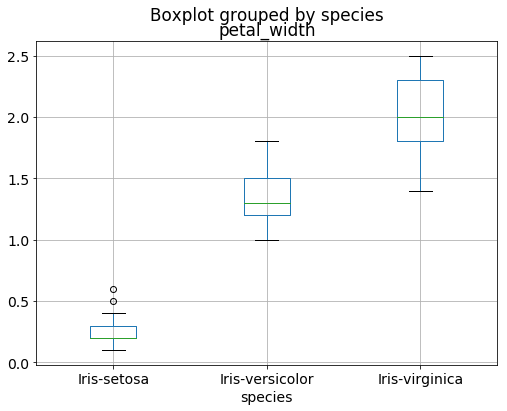

In [351]:
ax = iris.boxplot(column='petal_width', by='species', figsize=(8,6));

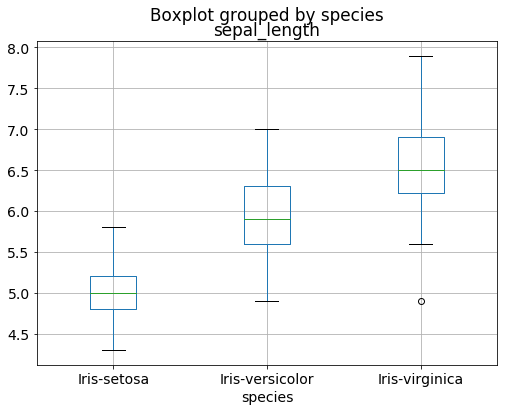

In [352]:
ax = iris.boxplot(column='sepal_length', by='species', figsize=(8,6));

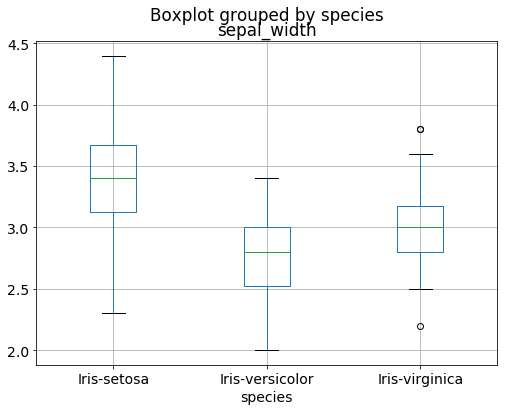

In [353]:
ax = iris.boxplot(column='sepal_width', by='species', figsize=(8,6));

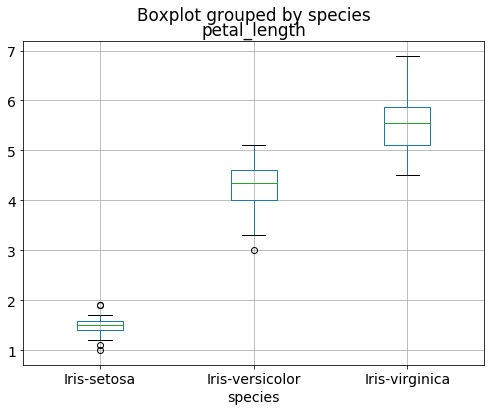

In [354]:
ax = iris.boxplot(column='petal_length', by='species', figsize=(8,6));

- Get the accuracy of a null model that simply predicts the most common species.

In [355]:
iris.loc[:,'species'].value_counts()
# accuracy of null model is 50/150 = 33%

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: species, dtype: int64

In [356]:
y = iris.loc[:,'species_num']
feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = iris.loc[:,feature_cols]
most_common_value = y.value_counts().idxmax()
null_pred = np.zeros(y.shape) + most_common_value
null_pred

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [357]:
null_accuracy = metrics.accuracy_score(null_pred, y)
null_accuracy

0.3333333333333333

- Develop a KNN model to predict species. Use ten-fold cross-validation to evaluate your model's accuracy on both training and test data. Remember to standardize your feature variables!

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

In [358]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

knn = KNeighborsClassifier ()
kf = model_selection.KFold (n_splits = 10, shuffle = True)


score_values_train = []
score_values_test = []
scores = []
n = 0
print("~~~~ CROSS VALIDATION each fold ~~~~")
for train_index, test_index in kf.split(X, y):
    knn = KNeighborsClassifier ().fit(X.iloc[train_index, :], y.iloc[train_index])
    
    score_values_train.append(metrics.accuracy_score(y.iloc[train_index], knn.predict(X.iloc[train_index, :])))
    score_values_test.append(metrics.accuracy_score(y.iloc[test_index], knn.predict(X.iloc[test_index, :])))
    
    scores.append(knn.score(X, y))
    
    n += 1
    
    print('Model {}'.format(n))
    print('Score_Test: {}'.format(score_values_test[n-1]))
    print('Score_Train: {}'.format(score_values_train[n-1]))
    print('R2: {}\n'.format(scores[n-1]))


print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print('Mean of Score_Train for all folds: {}'.format(np.mean(score_values_train)))
print('Mean of Score_Test for all folds: {}'.format(np.mean(score_values_test)))
print('Mean of R2 for all folds: {}'.format(np.mean(scores)))



~~~~ CROSS VALIDATION each fold ~~~~
Model 1
Score_Test: 1.0
Score_Train: 0.9629629629629629
R2: 0.9666666666666667

Model 2
Score_Test: 1.0
Score_Train: 0.9629629629629629
R2: 0.9666666666666667

Model 3
Score_Test: 0.8
Score_Train: 0.9925925925925926
R2: 0.9733333333333334

Model 4
Score_Test: 1.0
Score_Train: 0.9629629629629629
R2: 0.9666666666666667

Model 5
Score_Test: 1.0
Score_Train: 0.9703703703703703
R2: 0.9733333333333334

Model 6
Score_Test: 0.9333333333333333
Score_Train: 0.9703703703703703
R2: 0.9666666666666667

Model 7
Score_Test: 1.0
Score_Train: 0.9703703703703703
R2: 0.9733333333333334

Model 8
Score_Test: 1.0
Score_Train: 0.9703703703703703
R2: 0.9733333333333334

Model 9
Score_Test: 0.9333333333333333
Score_Train: 0.9629629629629629
R2: 0.96

Model 10
Score_Test: 0.9333333333333333
Score_Train: 0.9777777777777777
R2: 0.9733333333333334

~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of Score_Train for all folds: 0.9703703703703704
Mean of Score_Test for all folds: 0.96


- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

**This model did great compare to null model becasue Test Score is (0.953) while the null model score is 0.33 which shows that bias is very low. Since the test and train scores are pretty close, this model has a little variance.**

- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

**This model did great both on Train and Test sets, becasue Test Score (=0.953) and Train Score (=0.969) are very close to showing that bias is very low. Since the test and train scores are pretty close, this model has a little variance.**

- Does your model appear to have more of a bias problem or more of a variance problem? Why?

**I think bias is very good becasue it's almost close to score 1. But there can be a little overfitting in the model which causes the variance. I believe variance is not bad at all because Test and Train scores are very close.**

- Adjust $k$ to address this problem, and get the resulting test-set accuracy using ten-fold cross validation. Did your model get better or worse? By how much?

In [359]:
y = iris.loc[:,'species_num']
feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = iris.loc[:,feature_cols]
knn = KNeighborsClassifier (n_neighbors = 14)

kf = model_selection.KFold (n_splits = 10, shuffle = True)
print(np.mean(cross_val_score(knn, X, y, cv=kf, scoring='accuracy')))


0.9733333333333334


**It seems by selection k = 14 the model accuracy increase from 95 to 98.**

- Plot your model's test-set accuracy across a range of $k$ values using ten-fold cross validation. Use a large enough range of $k$ values to provide reasonable assurance that making $k$ larger would not help.

Tip: Use functions and loops to avoid writing duplicate code.

In [360]:

test_scores = []
iteration = []
for k in range(1, 100):
    
 
    knn = KNeighborsClassifier (n_neighbors = k)
    kf = model_selection.KFold (n_splits = 10, shuffle = True)
    test_accuracy = np.mean(cross_val_score(knn, X, y, cv=kf, scoring='accuracy'))
    test_scores.append(test_accuracy)
    iteration.append(k)

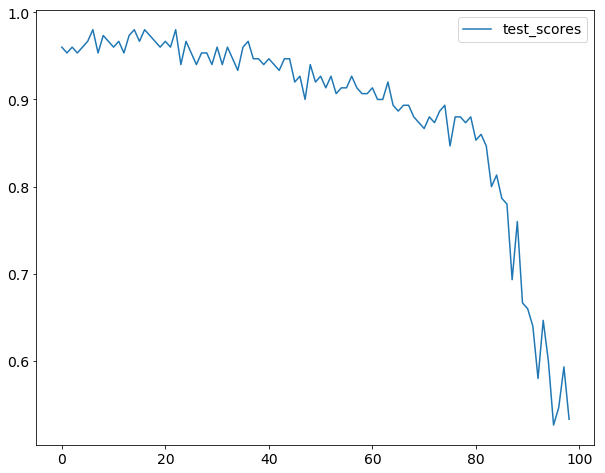

In [361]:
import matplotlib.pyplot as plt
scores_df = pd.DataFrame(test_scores, columns=['test_scores'])
scores_df.plot(figsize=(10,8));
#?plt.plot()

- **Bonus:** Find a *transformation* of one of more of your feature variables that allows you to create a model that performs better on the test set than your previous model. 

Possible examples:
    - Square a column
    - Take the square root of a column
    - Take the logarithm of a column
    - Multiply two columns together

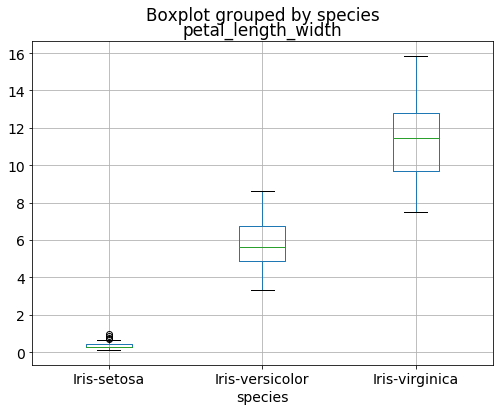

In [362]:
y = iris.loc[:,'species_num']
feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = iris.loc[:,feature_cols]
iris.loc[:,'petal_length_width'] = iris.loc[:,'petal_length'] * iris.loc[:,'petal_width' ] 
iris.boxplot(by = 'species', column = 'petal_length_width', figsize=(8,6));

In [363]:
y = iris.loc[:,'species_num']
feature_cols = ['sepal_length','sepal_width', 'petal_length', 'petal_width','petal_length_width']
X = iris.loc[:,feature_cols]
knn = KNeighborsClassifier (n_neighbors = 14)

kf = model_selection.KFold (n_splits = 10, shuffle = True)
print(np.mean(cross_val_score(knn, X, y, cv=kf, scoring='accuracy')))

0.9533333333333334


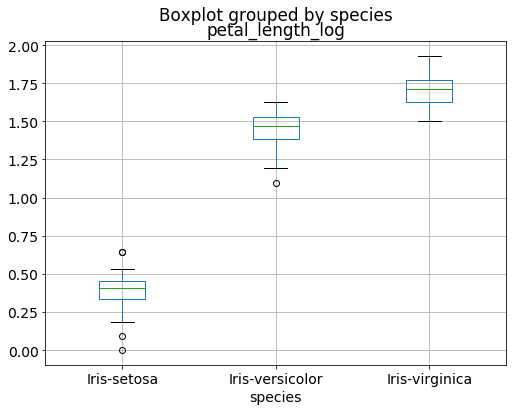

In [364]:
iris.loc[:,'petal_length_log'] = np.log(iris.loc[:,'petal_length']) 
iris.boxplot(by = 'species', column = 'petal_length_log', figsize=(8,6));

In [365]:
y = iris.loc[:,'species_num']
feature_cols = ['sepal_length','sepal_width', 'petal_length', 'petal_width','petal_length_log']
X = iris.loc[:,feature_cols]
knn = KNeighborsClassifier (n_neighbors = 14)

kf = model_selection.KFold (n_splits = 10, shuffle = True)
print(np.mean(cross_val_score(knn, X, y, cv=kf, scoring='accuracy')))

0.9733333333333334


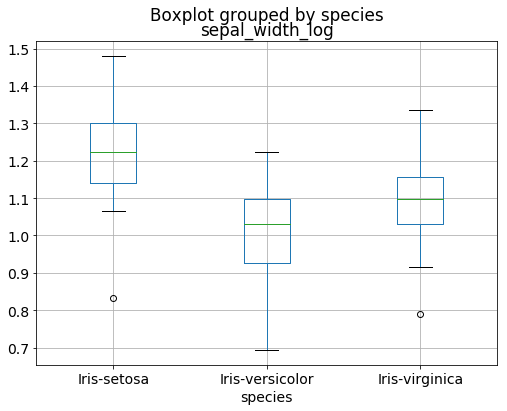

In [366]:
iris.loc[:,'sepal_width_log'] = np.log(iris.loc[:,'sepal_width'])
iris.boxplot(by = 'species', column = 'sepal_width_log', figsize=(8,6));

**Below variables are created and tried:**
- sepal width log --> accuracy = 0.973
- petal length log --> accuracy = 0.973
- petal width multiply by petal length --> accuracy = 0.953

**None of these variables has increased the original best accuracy that we achieved which is 0.98**

In [367]:
y = iris.loc[:,'species_num']
feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width','sepal_width_log']
X = iris.loc[:,feature_cols]

knn = KNeighborsClassifier (n_neighbors = 14)

kf = model_selection.KFold (n_splits = 10, shuffle = True)
print(np.mean(cross_val_score(knn, X, y, cv=kf, scoring='accuracy')))

0.9733333333333334


## Bonus

`scikit-learn` is the most popular machine learning library in Python, but there are alternative packages that have different strengths. 

### Example: Using the Statsmodels Formula

In [369]:
import os
os.getcwd()

'/Users/Mahyar/Desktop/unit3_homework-master'

In [370]:
# First, format our data in a DataFrame

df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.loc[:, 'MEDV'] = boston.target
df.head()

AttributeError: 'DataFrame' object has no attribute 'data'

In [375]:
# Set up our new statsmodel.formula handling model
import statsmodels.formula.api as smf

# You can easily swap these out to test multiple versions/different formulas
formulas = {
    "case1": "MEDV ~ RM + LSTAT + RAD + TAX + NOX + INDUS + CRIM + ZN - 1", # - 1 = remove intercept
    "case2": "MEDV ~ NOX + RM",
    "case3": "MEDV ~ RAD + TAX"
}

model = smf.ols(formula=formulas['case1'], data=boston)
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     78.39
Date:                Sun, 10 Feb 2019   Prob (F-statistic):           2.86e-48
Time:                        17:34:03   Log-Likelihood:                -124.45
No. Observations:                 150   AIC:                             264.9
Df Residuals:                     142   BIC:                             289.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM            -0.2224      0.065     -3.416      0.001      -0.351      -0.094
LSTAT         -0.0258      0.011     -2.455      0.015      -0.047      -0.005
RAD            0.0074      0.041      0.182      0.856      -0.073       0.088
TAX            0.0037      0.001      4.512      0.000       0.002       0.005
NOX            1.8674      1.114      1.676      0.096      -0.335       4.070
INDUS          0.0629      0.011      5.501      0.000       0.040       0.086
CRIM          -0.3503      0.137     -2.566      0.011      -0.620      -0.080
ZN             0.0044      0.003      1.676      0.096      -0.001       0.010
==============================================================================
Omnibus:                       86.513   Durbin-Watson:                   0.275
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.977
Skew:                          -0.004   Prob(JB):                      0.00682
Kurtosis:                       1.737   Cond. No.                     7.95e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Bonus Challenge #1:

Can you optimize your R2, selecting the best features and using either test-train split or k-folds?

In [406]:
import statsmodels.formula.api as smf
feature_cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'B']
X = boston.loc[:,feature_cols ]
y = boston.loc[:,'MEDV']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)


model = smf.ols(y_train, X_train)
result = model.fit()

#result.summary()

PatsyError: model is missing required outcome variables

### Bonus Challenge #2:

Given a combination of predictors, can you find another response variable that can be accurately predicted through the exploration of different predictors in this data set?

_Tip: Check out pairplots, coefficients, and Pearson scores._

**It seems RM can be accurately predicted through other predictors, the R-squared is 0.971**

In [384]:
# Check out variable relations
#it seems RM can be accurately predicted through other predictors, the R-squared is 0.971
import seaborn as sns

#sns.pairplot(X);

import statsmodels.formula.api as smf
formulas = {
    "case1": "RM ~ LSTAT + RAD + TAX + NOX + INDUS + CRIM + ZN - 1", # - 1 = remove intercept
}
model = smf.ols(formula=formulas['case1'], data=boston)
result = model.fit()
p

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     RM   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     2409.
Date:                Sun, 10 Feb 2019   Prob (F-statistic):               0.00
Time:                        17:37:18   Log-Likelihood:                -753.18
No. Observations:                 506   AIC:                             1520.
Df Residuals:                     499   BIC:                             1550.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
LSTAT         -0.0612      0.009     -6.736      0.000      -0.079      -0.043
RAD           -0.0909      0.013     -6.823      0.000      -0.117      -0.065
TAX            0.0052      0.001      6.604      0.000       0.004       0.007
NOX           12.2170      0.398     30.722      0.000      11.436      12.998
INDUS         -0.1117      0.012     -9.032      0.000      -0.136      -0.087
CRIM          -0.0128      0.007     -1.757      0.080      -0.027       0.002
ZN             0.0183      0.002      7.456      0.000       0.014       0.023
==============================================================================
Omnibus:                       91.832   Durbin-Watson:                   0.531
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              192.515
Skew:                          -0.983   Prob(JB):                     1.57e-42
Kurtosis:                       5.295   Cond. No.                     3.66e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [385]:
# Check out Pearson scores
boston.corr()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CRIM_sq,LSTAT_sq,RM_sq
Unnamed: 0,1.000000,0.404600,-0.103393,0.399439,-0.003759,0.398736,-0.079971,0.203784,-0.302211,0.686002,0.666626,0.291074,-0.295041,0.258465,0.942830,0.176008,0.240014,-0.072196
CRIM,0.404600,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,0.127660,0.871549,0.457213,-0.204235
ZN,-0.103393,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,-0.106706,-0.082419,-0.323323,0.307863
INDUS,0.399439,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,0.610926,0.171625,0.532496,-0.382654
CHAS,-0.003759,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.100335,-0.041043,-0.047605,0.098034
NOX,0.398736,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,0.453679,0.173777,0.530723,-0.283930
RM,-0.079971,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,-0.099081,-0.086514,-0.545322,0.994528
AGE,0.203784,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,0.344185,0.158565,0.523764,-0.222991
DIS,-0.302211,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,-0.601534,-0.173915,-0.448110,0.183715
RAD,0.686002,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,0.199874,0.279097,0.451766,-0.196734


### Demo: Patsy

In [9]:
import patsy

# Add response to the core DataFrame
df.loc[:, 'MEDV'] = y

In [10]:
from sklearn.model_selection import train_test_split #If you didn't import it earlier, do so now

# Easily change your variable predictors without reslicing your DataFrame
y, X = patsy.dmatrices("MEDV ~ AGE + RM", data=df, return_type="dataframe")

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7)


/Users/greg/anaconda3/envs/ga/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [11]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

# Rerun your model, iteratively changing your variables and train_size from the previous cell

lm = LinearRegression()
model = lm.fit(X_train, y_train)

predictions = model.predict(X_test)
print("R^2 Score: {}".format(metrics.r2_score(y_test, predictions)))

R^2 Score: 0.40402292728493383
